In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

# set text size for plots to be larger
plt.rcParams.update({"font.size": 16})

import glob
import os
import tqdm
import plot_fuctions as pf
from plot_fuctions import load_and_process_file, get_revo_count, get_combined_count, set_paths


In [3]:
cwd = os.getcwd()
print(cwd)

/home/joe/ttop/cascade/model_analysis


In [4]:
# change current working directory to the folder where the data is stored
cwd = os.chdir("/home/joe/ttop/cascade/")
data_path = os.getcwd() + "/data/midway_294444"
model_path = os.getcwd() + "/data/midway_full_run/model/"
image_path = os.getcwd() + "/model_analysis/analysis_images/midway_294444/"
data_directory = pf.set_paths(data_path, image_path)

# Load Data

In [102]:
all_files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.parquet')]
all_dataframes = [load_and_process_file(file_path) for file_path in all_files]
df = pd.concat(all_dataframes, ignore_index=True)
print(df.head())

   Step    Seed  Citizen Count  Active Count  Support Count  Oppose Count  \
0     0  344033           1120             0           1120             0   
1     1  344033           1120             0           1120             0   
2     2  344033           1120             0           1120             0   
3     3  344033           1120             0           1120             0   
4     4  344033           1120             0           1120             0   

   Jail Count  Speed of Spread  Security Density  Private Preference  Epsilon  \
0           0              0.0              0.04                -0.2      0.5   
1           0              0.0              0.04                -0.2      0.5   
2           0              0.0              0.04                -0.2      0.5   
3           0              0.0              0.04                -0.2      0.5   
4           0              0.0              0.04                -0.2      0.5   

   Threshold  Revolution                          

## The expectation is that higher uncertainties with regards to state expectations in less strict authoritarian environments causes more frequent but slower spreading resistance cascades with fewer equilibrium flips and more oscillations.

In [103]:
unique_model_count = df["Model"].nunique()
print(f"There are {unique_model_count} unique values in the 'model' column.")

There are 10000 unique values in the 'model' column.


In [104]:
unique_model_count = df["Model"].nunique()
print(f"There are {unique_model_count} unique values in the 'model' column.")
get_revo_count(df)
df = get_combined_count(df)

There are 10000 unique values in the 'model' column.
3278 different 'models' had a revolution.
3671 models had more than half of the population active or opposing.


In [105]:
df.to_parquet("data/midway_294444.parquet")

In [5]:
df = pd.read_parquet("data/midway_294444.parquet")

# The Other Model Runs with Security

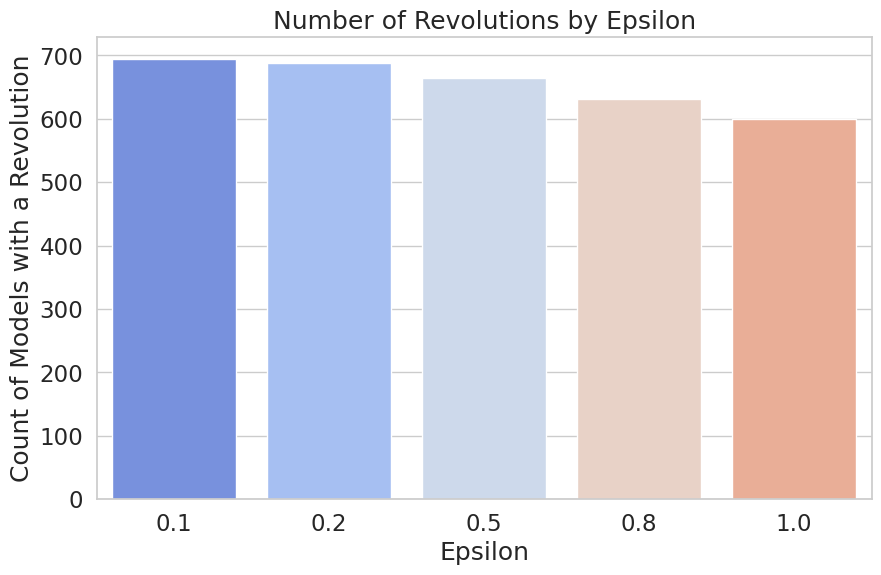

In [106]:
pf.revo_count_ep_plot(df)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

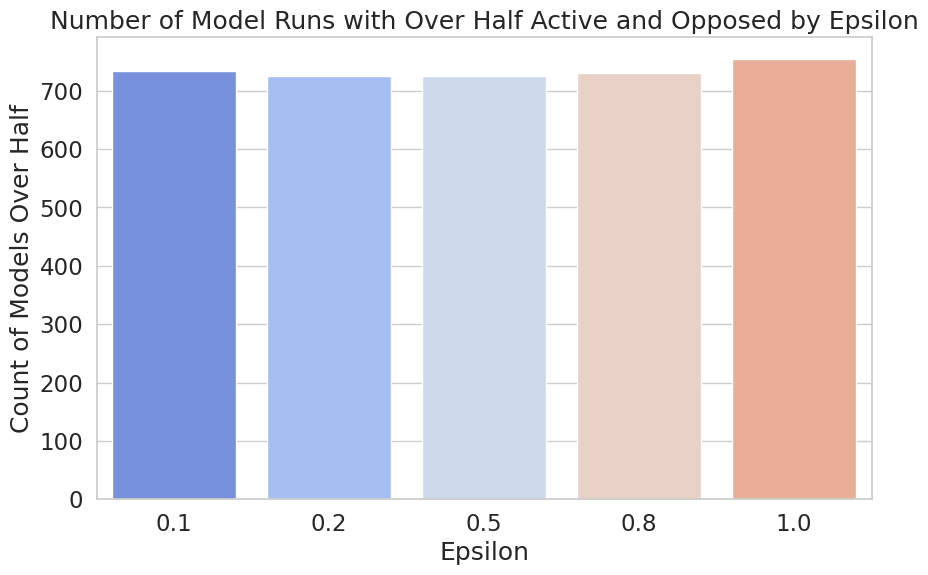

In [118]:
pf.over_half_comb_ep_plot(df)

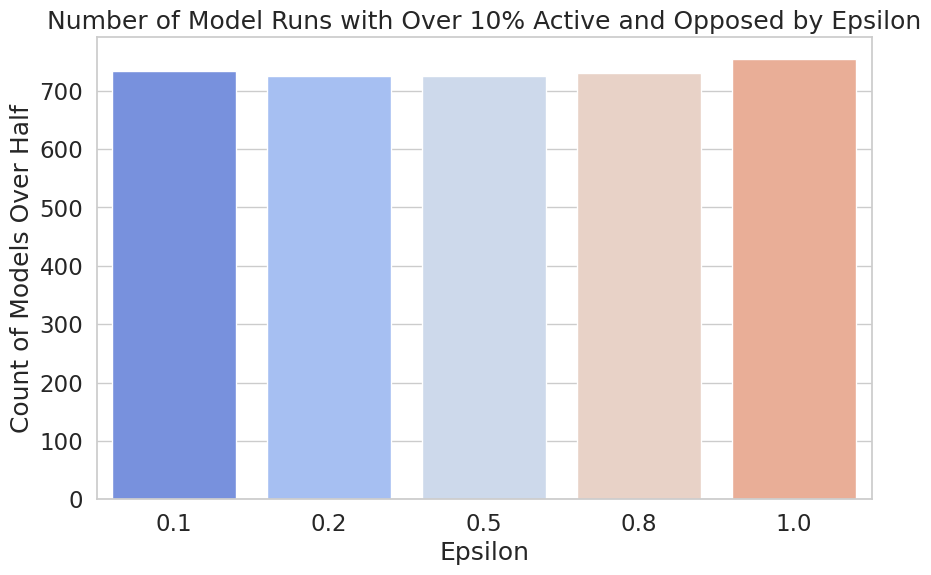

In [107]:
pf.over_half_ep_plot(df)

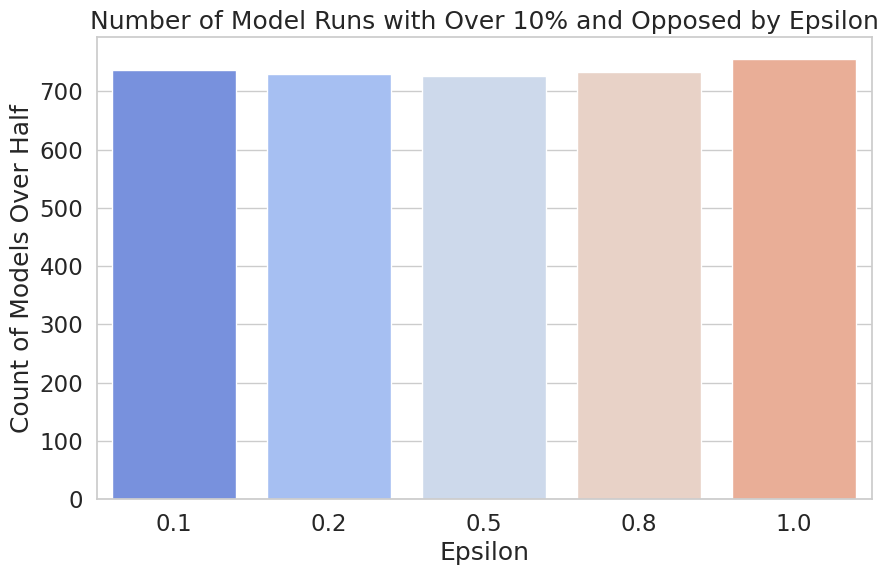

In [108]:
pf.over_10_ep_plot(df)

In [5]:
# Filter the DataFrame for Revolution == True
revolution_true = df[df["Revolution"] == True]["Model"].drop_duplicates()

# Pull all models that have a revolution
revolution_true_df = df[df["Model"].isin(revolution_true)]

# Group the data by Epsilon, Private Preference, and Model, and count the unique models
grouped_df = (
    revolution_true_df.groupby(["Epsilon", "Private Preference", "Model"])
    .size()
    .reset_index(name="Count")
)

# Calculate the total number of models for each Epsilon
total_models_per_epsilon = grouped_df.groupby("Epsilon")["Model"].nunique().reset_index(name="Total_Models")

# Merge the grouped DataFrame with the total models per Epsilon DataFrame
merged_df = pd.merge(grouped_df, total_models_per_epsilon, on="Epsilon")

# Calculate the proportion of total models for each row
merged_df["Proportion"] = merged_df["Count"] / merged_df["Total_Models"]

# Pivot the merged DataFrame to create a matrix with Epsilon as rows, Private Preference as columns, and Proportion as values
pivot_df = merged_df.pivot_table(index="Epsilon", columns="Private Preference", values="Proportion", fill_value=0)

# Set the style, color palette, and font size for the plots
sns.set(style="whitegrid")
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.5)

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn's heatmap
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlOrRd", vmin=pivot_df.min().min(), vmax=pivot_df.max().max())

# Customize the plot
plt.title("Proportion of Revolutions by Epsilon and Private Preference")
plt.xlabel("Private Preference")
plt.ylabel("Epsilon")

# Save the figure at 300 dpi
plt.savefig(
    image_path + "revolutions_heatmap_proportion_revolutions_epsilon_private_preference.png",
    dpi=300,
    bbox_inches="tight",
)

# Display the plot
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

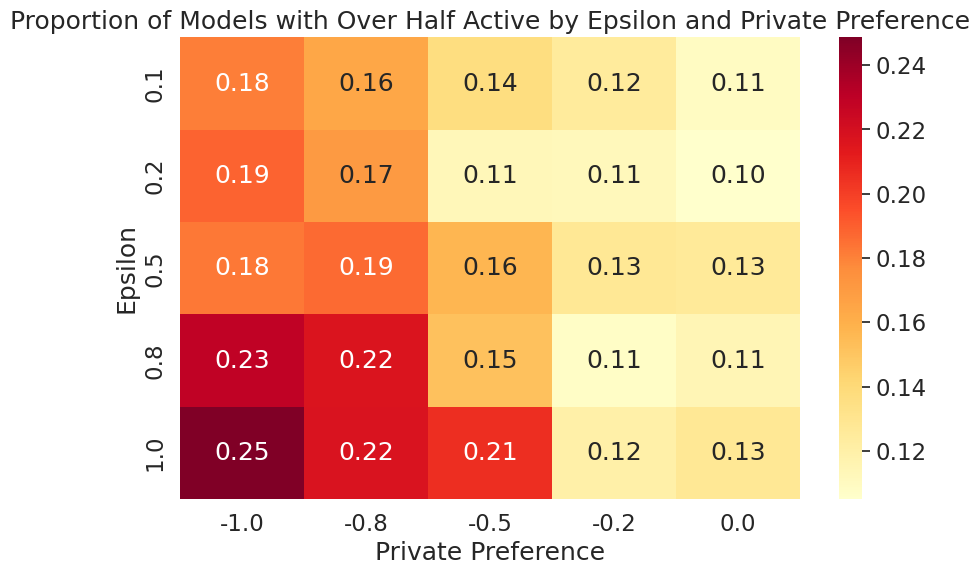

In [133]:
# Filter the DataFrame for Revolution == True
over_half = df[df["Over Half"] == True]["Model"].drop_duplicates()

# Pull all models that have a revolution
over_half_df = df[df["Model"].isin(over_half)]

# Group the data by Epsilon, Private Preference, and Model, and count the unique models
grouped_df = (
    over_half_df.groupby(["Epsilon", "Private Preference", "Model"])
    .size()
    .reset_index(name="Count")
)

# Calculate the total number of models for each Epsilon
total_models_per_epsilon = grouped_df.groupby("Epsilon")["Model"].nunique().reset_index(name="Total_Models")

# Merge the grouped DataFrame with the total models per Epsilon DataFrame
merged_df = pd.merge(grouped_df, total_models_per_epsilon, on="Epsilon")

# Calculate the proportion of total models for each row
merged_df["Proportion"] = merged_df["Count"] / merged_df["Total_Models"]

# Pivot the merged DataFrame to create a matrix with Epsilon as rows, Private Preference as columns, and Proportion as values
pivot_df = merged_df.pivot_table(index="Epsilon", columns="Private Preference", values="Proportion", fill_value=0)

# Set the style, color palette, and font size for the plots
sns.set(style="whitegrid")
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.5)

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn's heatmap
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlOrRd", vmin=pivot_df.min().min(), vmax=pivot_df.max().max())

# Customize the plot
plt.title("Proportion of Models with Over Half Active by Epsilon and Private Preference")
plt.xlabel("Private Preference")
plt.ylabel("Epsilon")

# Save the figure at 300 dpi
plt.savefig(
    image_path + "over_half_heatmap_proportion_epsilon_private_preference.png",
    dpi=300,
    bbox_inches="tight",
)

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

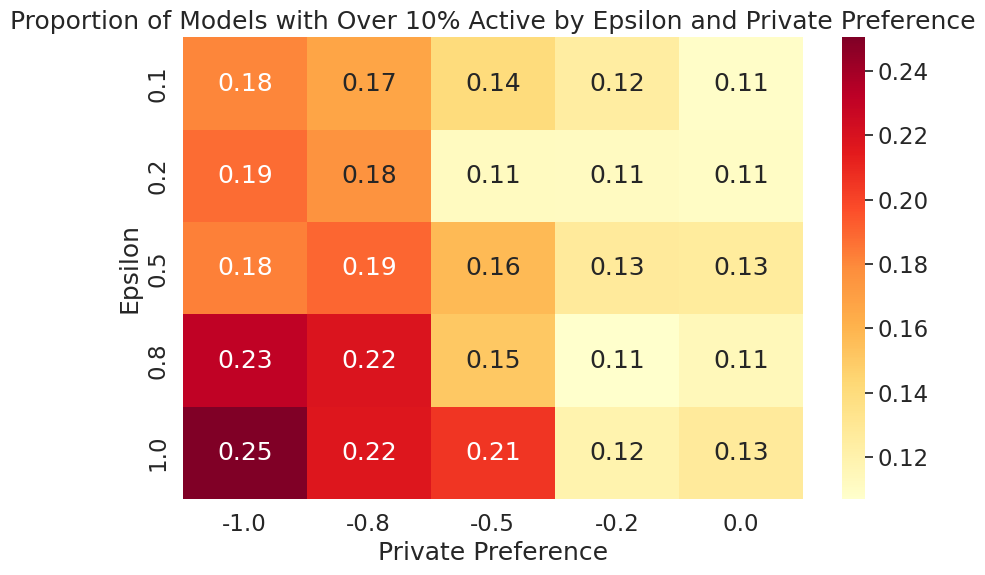

In [7]:
# Filter the DataFrame for Revolution == True
over_ten = df[df["Combined Count"] >= 112]["Model"].drop_duplicates()

# Pull all models that have a revolution
over_ten_df = df[df["Model"].isin(over_ten)]

# Group the data by Epsilon, Private Preference, and Model, and count the unique models
grouped_df = (
    over_ten_df.groupby(["Epsilon", "Private Preference", "Model"])
    .size()
    .reset_index(name="Count")
)

# Calculate the total number of models for each Epsilon
total_models_per_epsilon = grouped_df.groupby("Epsilon")["Model"].nunique().reset_index(name="Total_Models")

# Merge the grouped DataFrame with the total models per Epsilon DataFrame
merged_df = pd.merge(grouped_df, total_models_per_epsilon, on="Epsilon")

# Calculate the proportion of total models for each row
merged_df["Proportion"] = merged_df["Count"] / merged_df["Total_Models"]

# Pivot the merged DataFrame to create a matrix with Epsilon as rows, Private Preference as columns, and Proportion as values
pivot_df = merged_df.pivot_table(index="Epsilon", columns="Private Preference", values="Proportion", fill_value=0)

# Set the style, color palette, and font size for the plots
sns.set(style="whitegrid")
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.5)

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn's heatmap
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlOrRd", vmin=pivot_df.min().min(), vmax=pivot_df.max().max())

# Customize the plot
plt.title("Proportion of Models with Over 10% Active by Epsilon and Private Preference")
plt.xlabel("Private Preference")
plt.ylabel("Epsilon")

# Save the figure at 300 dpi
plt.savefig(
    image_path + "over_10_heatmap_proportion_epsilon_private_preference.png",
    dpi=300,
    bbox_inches="tight",
)

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

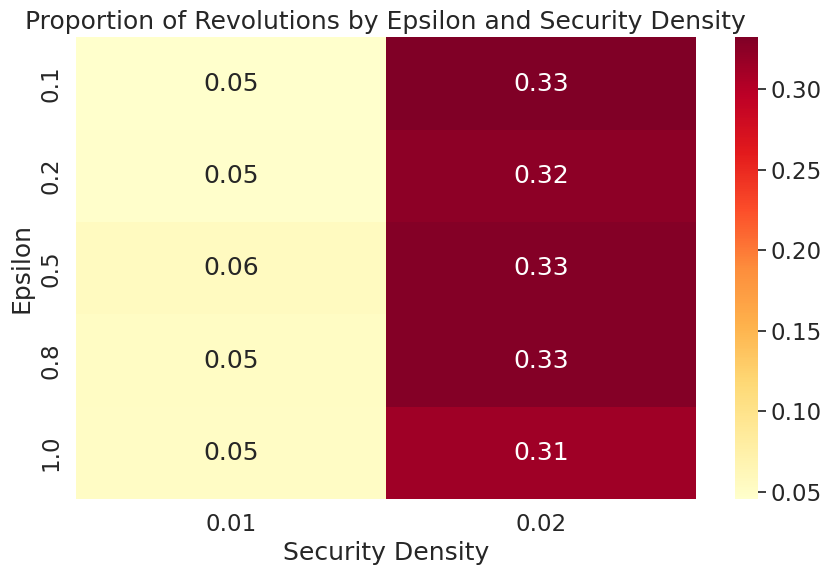

In [131]:
# Filter the DataFrame for Revolution == True
revolution_true = df[df["Revolution"] == True]["Model"].drop_duplicates()

# Pull all models that have a revolution
revolution_true_df = df[df["Model"].isin(revolution_true)]

# Group the data by Epsilon, Security Density, and Model, and count the unique models
grouped_df = (
    revolution_true_df.groupby(["Epsilon", "Security Density", "Model"])
    .size()
    .reset_index(name="Count")
)

# Calculate the total number of models for each Epsilon
total_models_per_epsilon = grouped_df.groupby("Epsilon")["Model"].nunique().reset_index(name="Total_Models")

# Merge the grouped DataFrame with the total models per Epsilon DataFrame
merged_df = pd.merge(grouped_df, total_models_per_epsilon, on="Epsilon")

# Calculate the proportion of total models for each row
merged_df["Proportion"] = merged_df["Count"] / merged_df["Total_Models"]

# Pivot the merged DataFrame to create a matrix with Epsilon as rows, Security Density as columns, and Proportion as values
pivot_df = merged_df.pivot_table(index="Epsilon", columns="Security Density", values="Proportion", fill_value=0)

# Set the style, color palette, and font size for the plots
sns.set(style="whitegrid")
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.5)

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn's heatmap
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlOrRd", vmin=pivot_df.min().min(), vmax=pivot_df.max().max())

# Customize the plot
plt.title("Proportion of Revolutions by Epsilon and Security Density")
plt.xlabel("Security Density")
plt.ylabel("Epsilon")

# Save the figure at 300 dpi
plt.savefig(
    image_path + "revolutions_heatmap_proportion_revolutions_epsilon_security_density.png",
    dpi=300,
    bbox_inches="tight",
)

# Display the plot
plt.show()

In [112]:
# Filter the final_df DataFrame
filtered_df = df[df["Revolution"] == True]

# Group the filtered DataFrame by Epsilon and Security Density and count the unique models
model_count_by_epsilon_sd = filtered_df.groupby(["Security Density", "Epsilon"])[
    "Model"
].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon_sd)


Security Density  Epsilon
0.01              0.1        500
                  0.2        499
                  0.5        500
                  0.8        499
                  1.0        500
0.02              0.1        194
                  0.2        189
                  0.5        165
                  0.8        132
                  1.0        100
Name: Model, dtype: int64


In [136]:
# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
filtered_df = df[df["Combined Count"] > 112]

model_count_by_epsilon = filtered_df.groupby("Epsilon")["Model"].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon)

Epsilon
0.1    736
0.2    729
0.5    726
0.8    733
1.0    755
Name: Model, dtype: int64


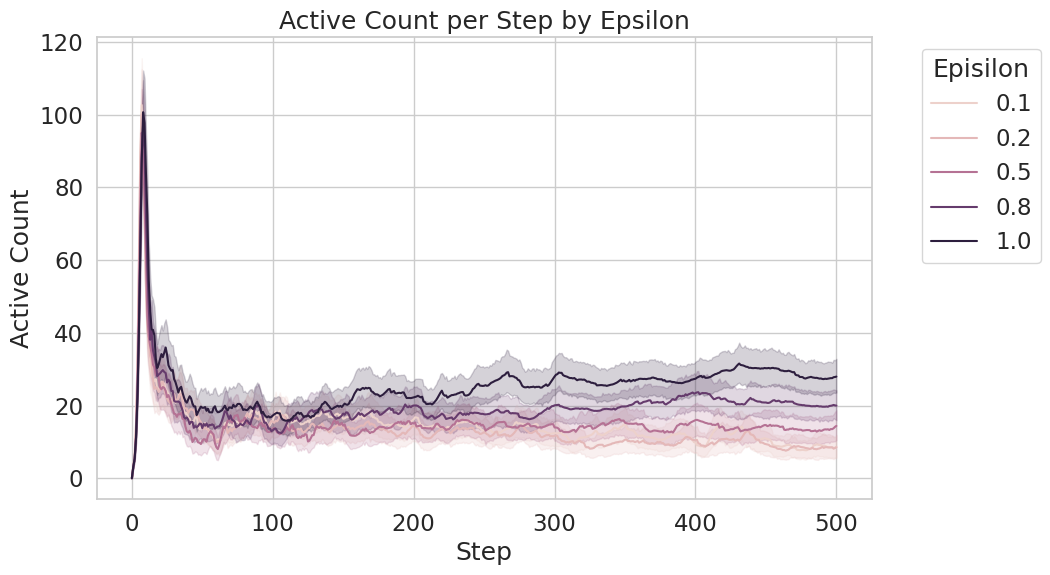

In [8]:
pf.active_count_ep_plot(df)

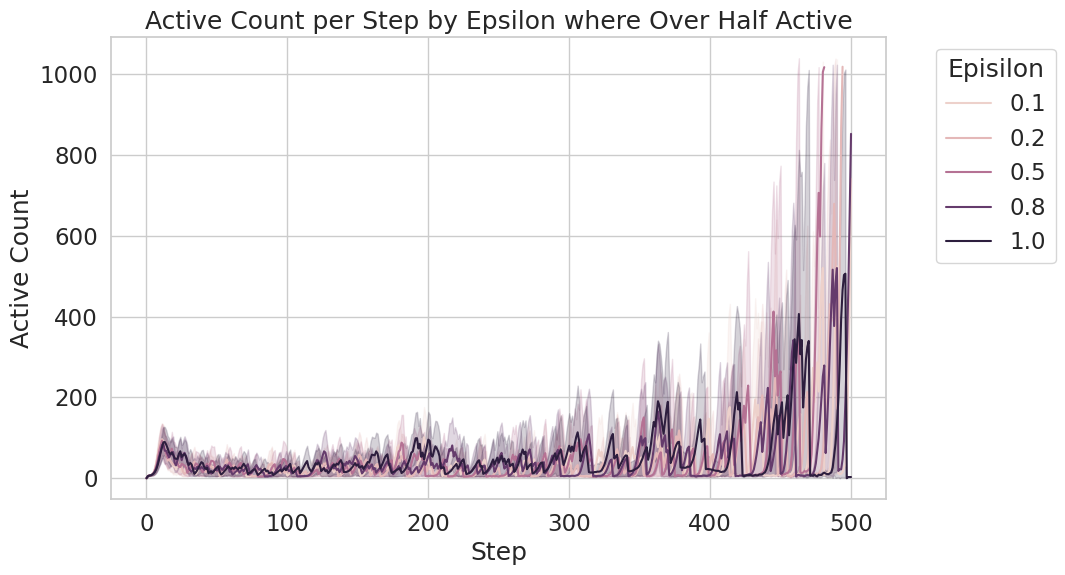

In [82]:
pf.over_half_active_count_ep_plot(df)

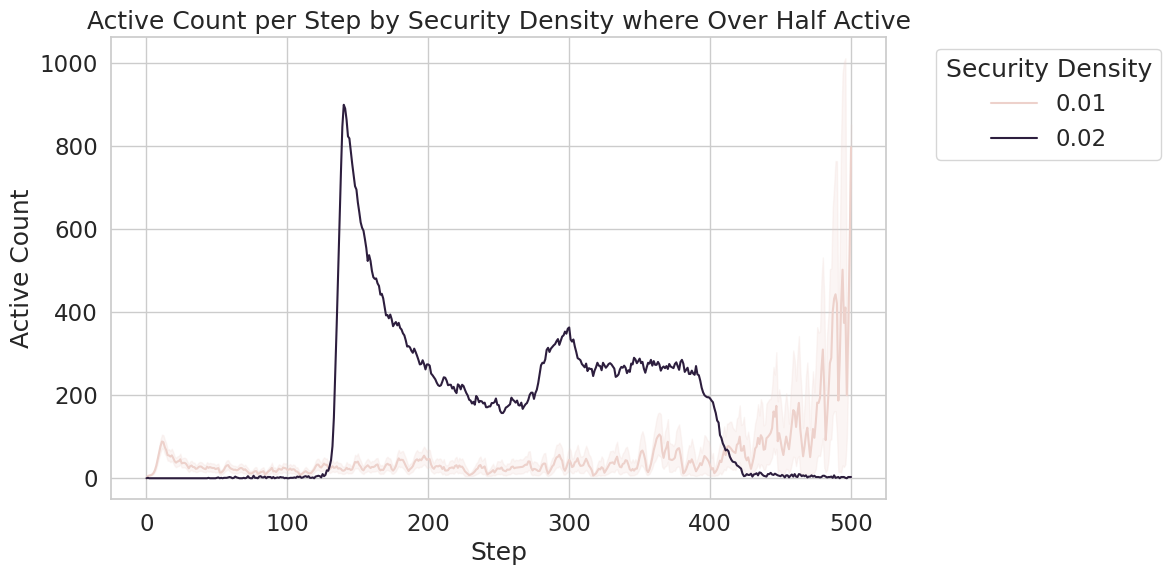

In [83]:
pf.over_half_active_count_sd_plot(df)

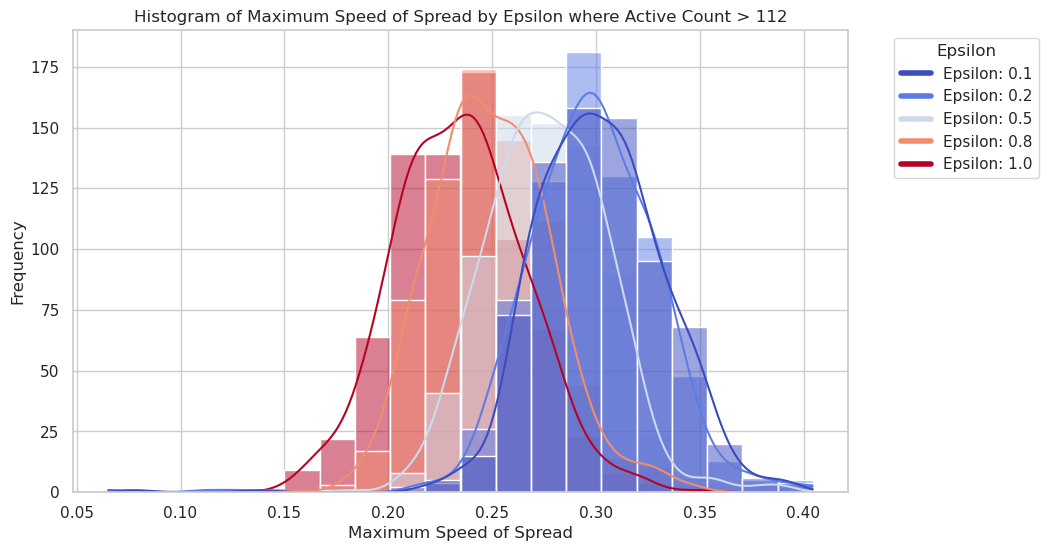

In [114]:
pf.histogram_over_112(df)

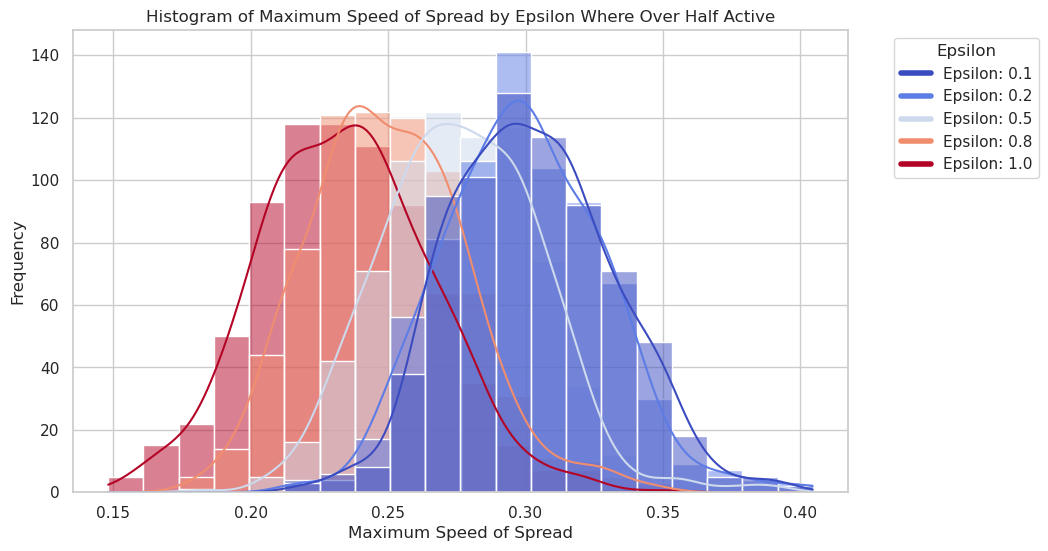

In [115]:
pf.histogram_over_half(df)

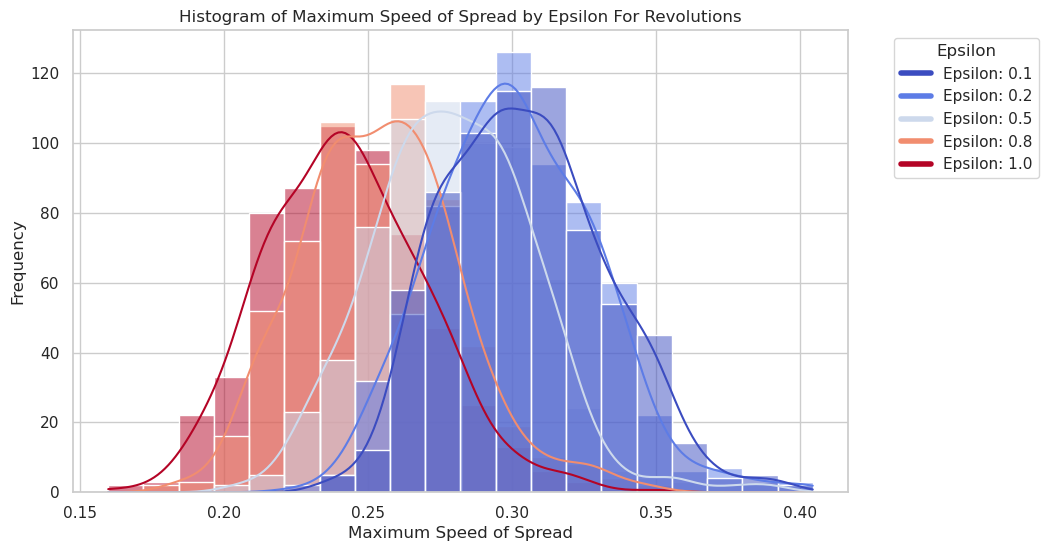

In [116]:
pf.histogram_rev(df)

# Fluctions

In [117]:
fluctuating_models = pf.check_for_ratio_fluctuations(df, 0.10, 0.2)
print(f'Models with fluctuating active ratios: {fluctuating_models}')

Models with fluctuating active ratios: {'Seed 344067 SD0.02 PP -1 EP 1 Th 2.94444', 'Seed 344029 SD0.03 PP -1 EP 0.1 Th 2.94444', 'Seed 344008 SD0.03 PP -1 EP 0.5 Th 2.94444', 'Seed 344094 SD0.03 PP -1 EP 0.2 Th 2.94444', 'Seed 344005 SD0.03 PP -1 EP 0.1 Th 2.94444', 'Seed 344094 SD0.03 PP -1 EP 0.1 Th 2.94444', 'Seed 344055 SD0.02 PP -0.8 EP 1 Th 2.94444', 'Seed 344041 SD0.03 PP -0.5 EP 0.5 Th 2.94444', 'Seed 344026 SD0.02 PP 0 EP 1 Th 2.94444', 'Seed 344096 SD0.02 PP -0.5 EP 1 Th 2.94444', 'Seed 344041 SD0.03 PP -0.5 EP 0.2 Th 2.94444', 'Seed 344090 SD0.03 PP -1 EP 0.2 Th 2.94444', 'Seed 344036 SD0.03 PP -1 EP 0.2 Th 2.94444', 'Seed 344000 SD0.02 PP 0 EP 1 Th 2.94444', 'Seed 344010 SD0.03 PP -1 EP 0.2 Th 2.94444', 'Seed 344029 SD0.03 PP -1 EP 0.5 Th 2.94444', 'Seed 344005 SD0.03 PP -1 EP 0.5 Th 2.94444', 'Seed 344085 SD0.03 PP -1 EP 0.8 Th 2.94444', 'Seed 344041 SD0.03 PP -1 EP 0.2 Th 2.94444', 'Seed 344036 SD0.03 PP -0.8 EP 0.2 Th 2.94444', 'Seed 344041 SD0.03 PP -1 EP 0.1 Th 2.9444

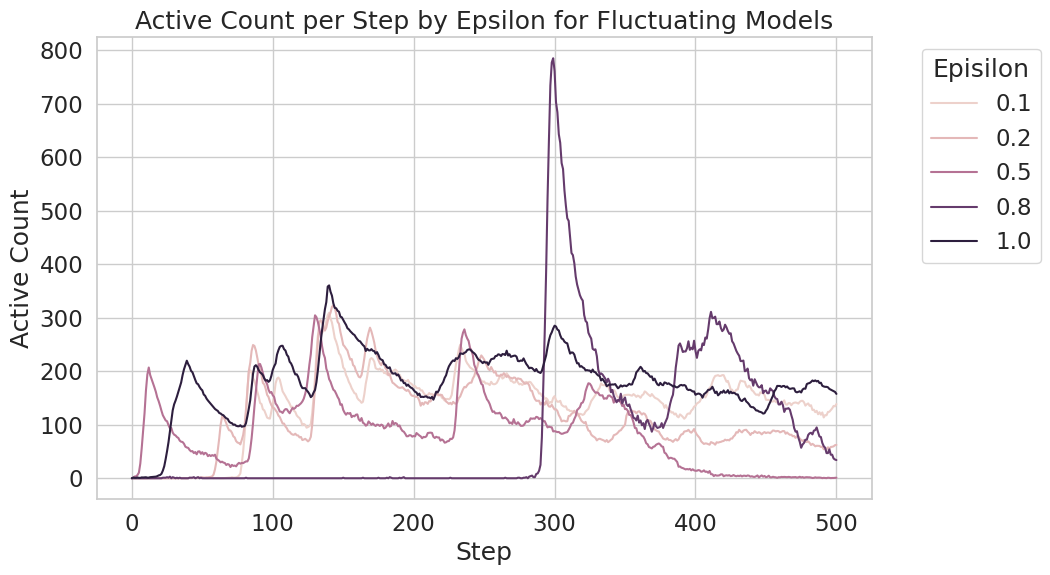

In [121]:
pf.fluctuate_active_plot(df, fluctuating_models)

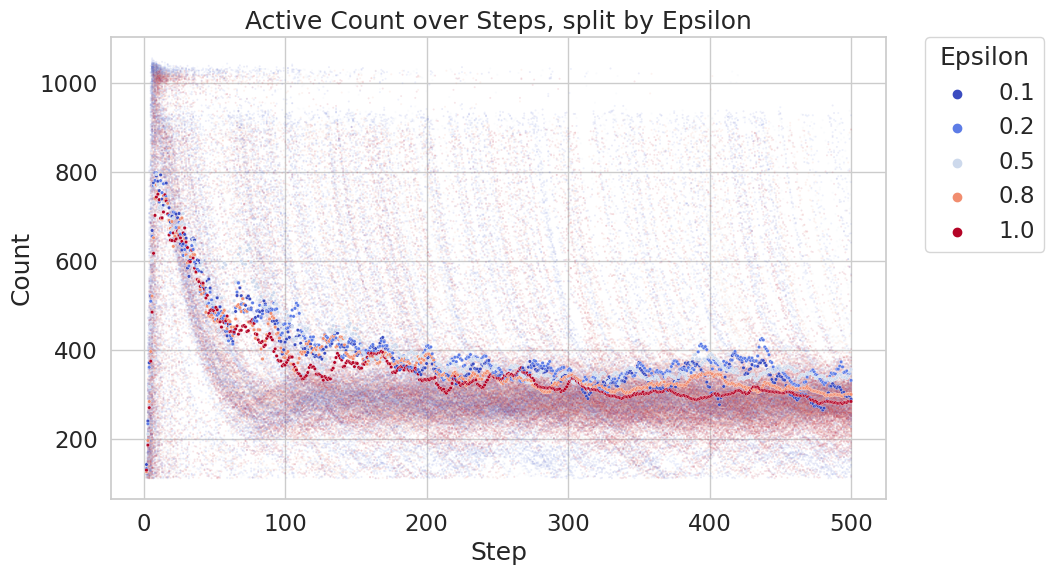

In [15]:
# Create a heatmap using Seaborn's heatmap
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(10, 6))

df_filtered = df[df['Active Count'] >= 112]

# Create a long format DataFrame suitable for seaborn
df_long = df_filtered.melt(id_vars=['Step', 'Epsilon'], value_vars=['Active Count'], var_name='Group', value_name='Count')

# Scatterplot
ax = sns.scatterplot(x="Step", y="Count", hue="Epsilon", palette="coolwarm",
                     s=2, alpha=0.1, hue_order=sorted(df_long["Epsilon"].unique()),
                     data=df_long)
ax.set_title('Active Count over Steps, split by Epsilon')

# Calculate the average counts for each epsilon value
batch_avgs = df_long.groupby(["Step", "Group", "Epsilon"]).mean().reset_index()

# Plot the averages
avg_data = sns.scatterplot(x="Step", y="Count", hue="Epsilon", palette="coolwarm",
                         s=6, data=batch_avgs, legend=False)

# Remove the default legend
ax.get_legend().remove()

# Create a custom legend with the title 'Epsilon'
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[0:], labels[0:], title="Epsilon", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Save the figure at 300 dpi
plt.savefig(
    image_path + "active_count_steps_avg_by_ep.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()


<Figure size 1000x600 with 0 Axes>

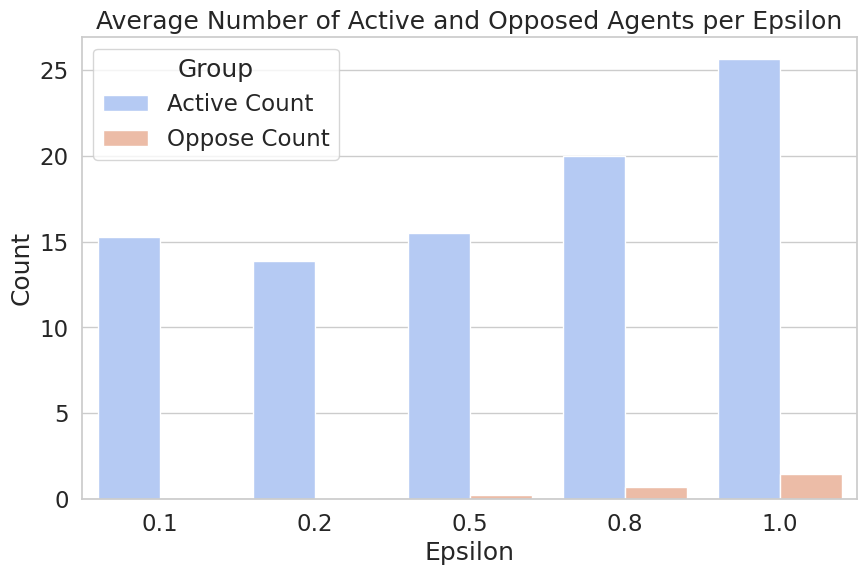

In [11]:
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(10, 6))


# Calculate the average counts for each epsilon value
group_avgs = df.groupby('Epsilon').agg({'Active Count': 'mean', 'Oppose Count': 'mean'}).reset_index()

# Reshape the DataFrame for seaborn barplot
group_avgs = group_avgs.melt(id_vars='Epsilon', var_name='Group', value_name='Count')

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Epsilon', y='Count', hue='Group', data=group_avgs, palette='coolwarm')
plt.title('Average Number of Active and Opposed Agents per Epsilon')

plt.savefig(
    image_path + "avg_act_opp_ep.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()



<Figure size 1000x600 with 0 Axes>

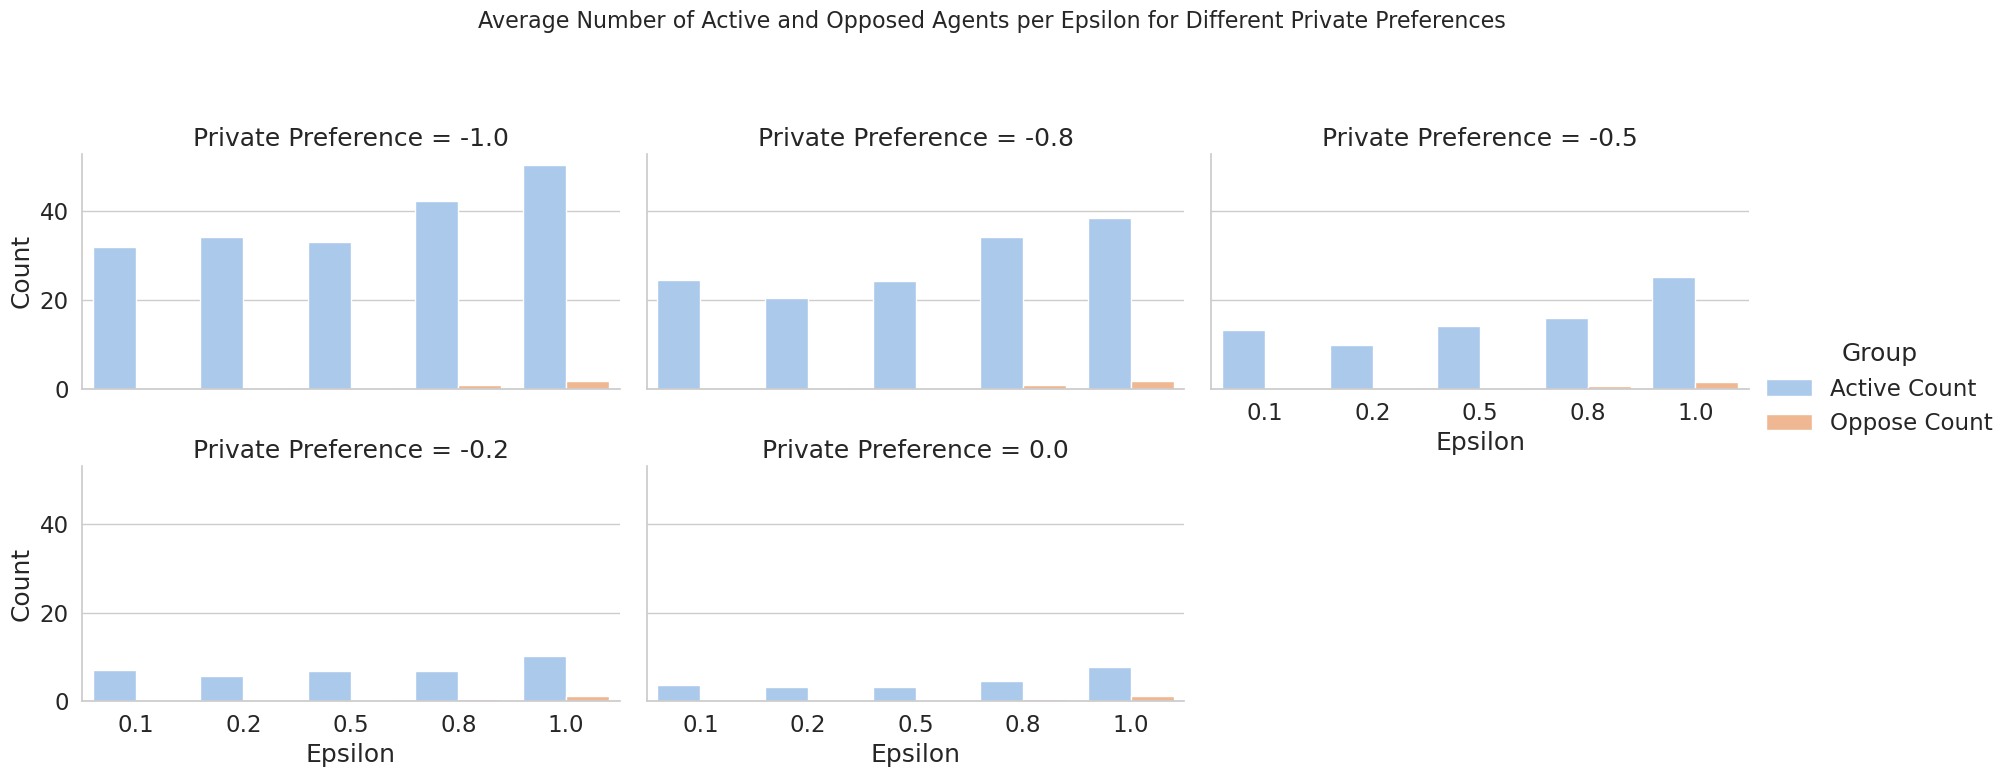

In [127]:
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(10, 6))


# Calculate the average counts for each epsilon and private preference value
group_avgs = df.groupby(['Epsilon', 'Private Preference']).agg({'Active Count': 'mean', 'Oppose Count': 'mean'}).reset_index()

# Reshape the DataFrame for seaborn barplot
group_avgs = group_avgs.melt(id_vars=['Epsilon', 'Private Preference'], var_name='Group', value_name='Count')

# Create FacetGrid with bar plots
g = sns.FacetGrid(group_avgs, col='Private Preference', col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='Epsilon', y='Count', hue='Group', palette='pastel')

# Customize the FacetGrid
g.set_axis_labels('Epsilon', 'Count')
g.add_legend(title='Group', title_fontsize=12, label_order=['Active Count', 'Oppose Count'])
g.fig.subplots_adjust(top=0.8)  # Adjust the top space
g.fig.suptitle('Average Number of Active and Opposed Agents per Epsilon for Different Private Preferences', fontsize=16)

plt.show()


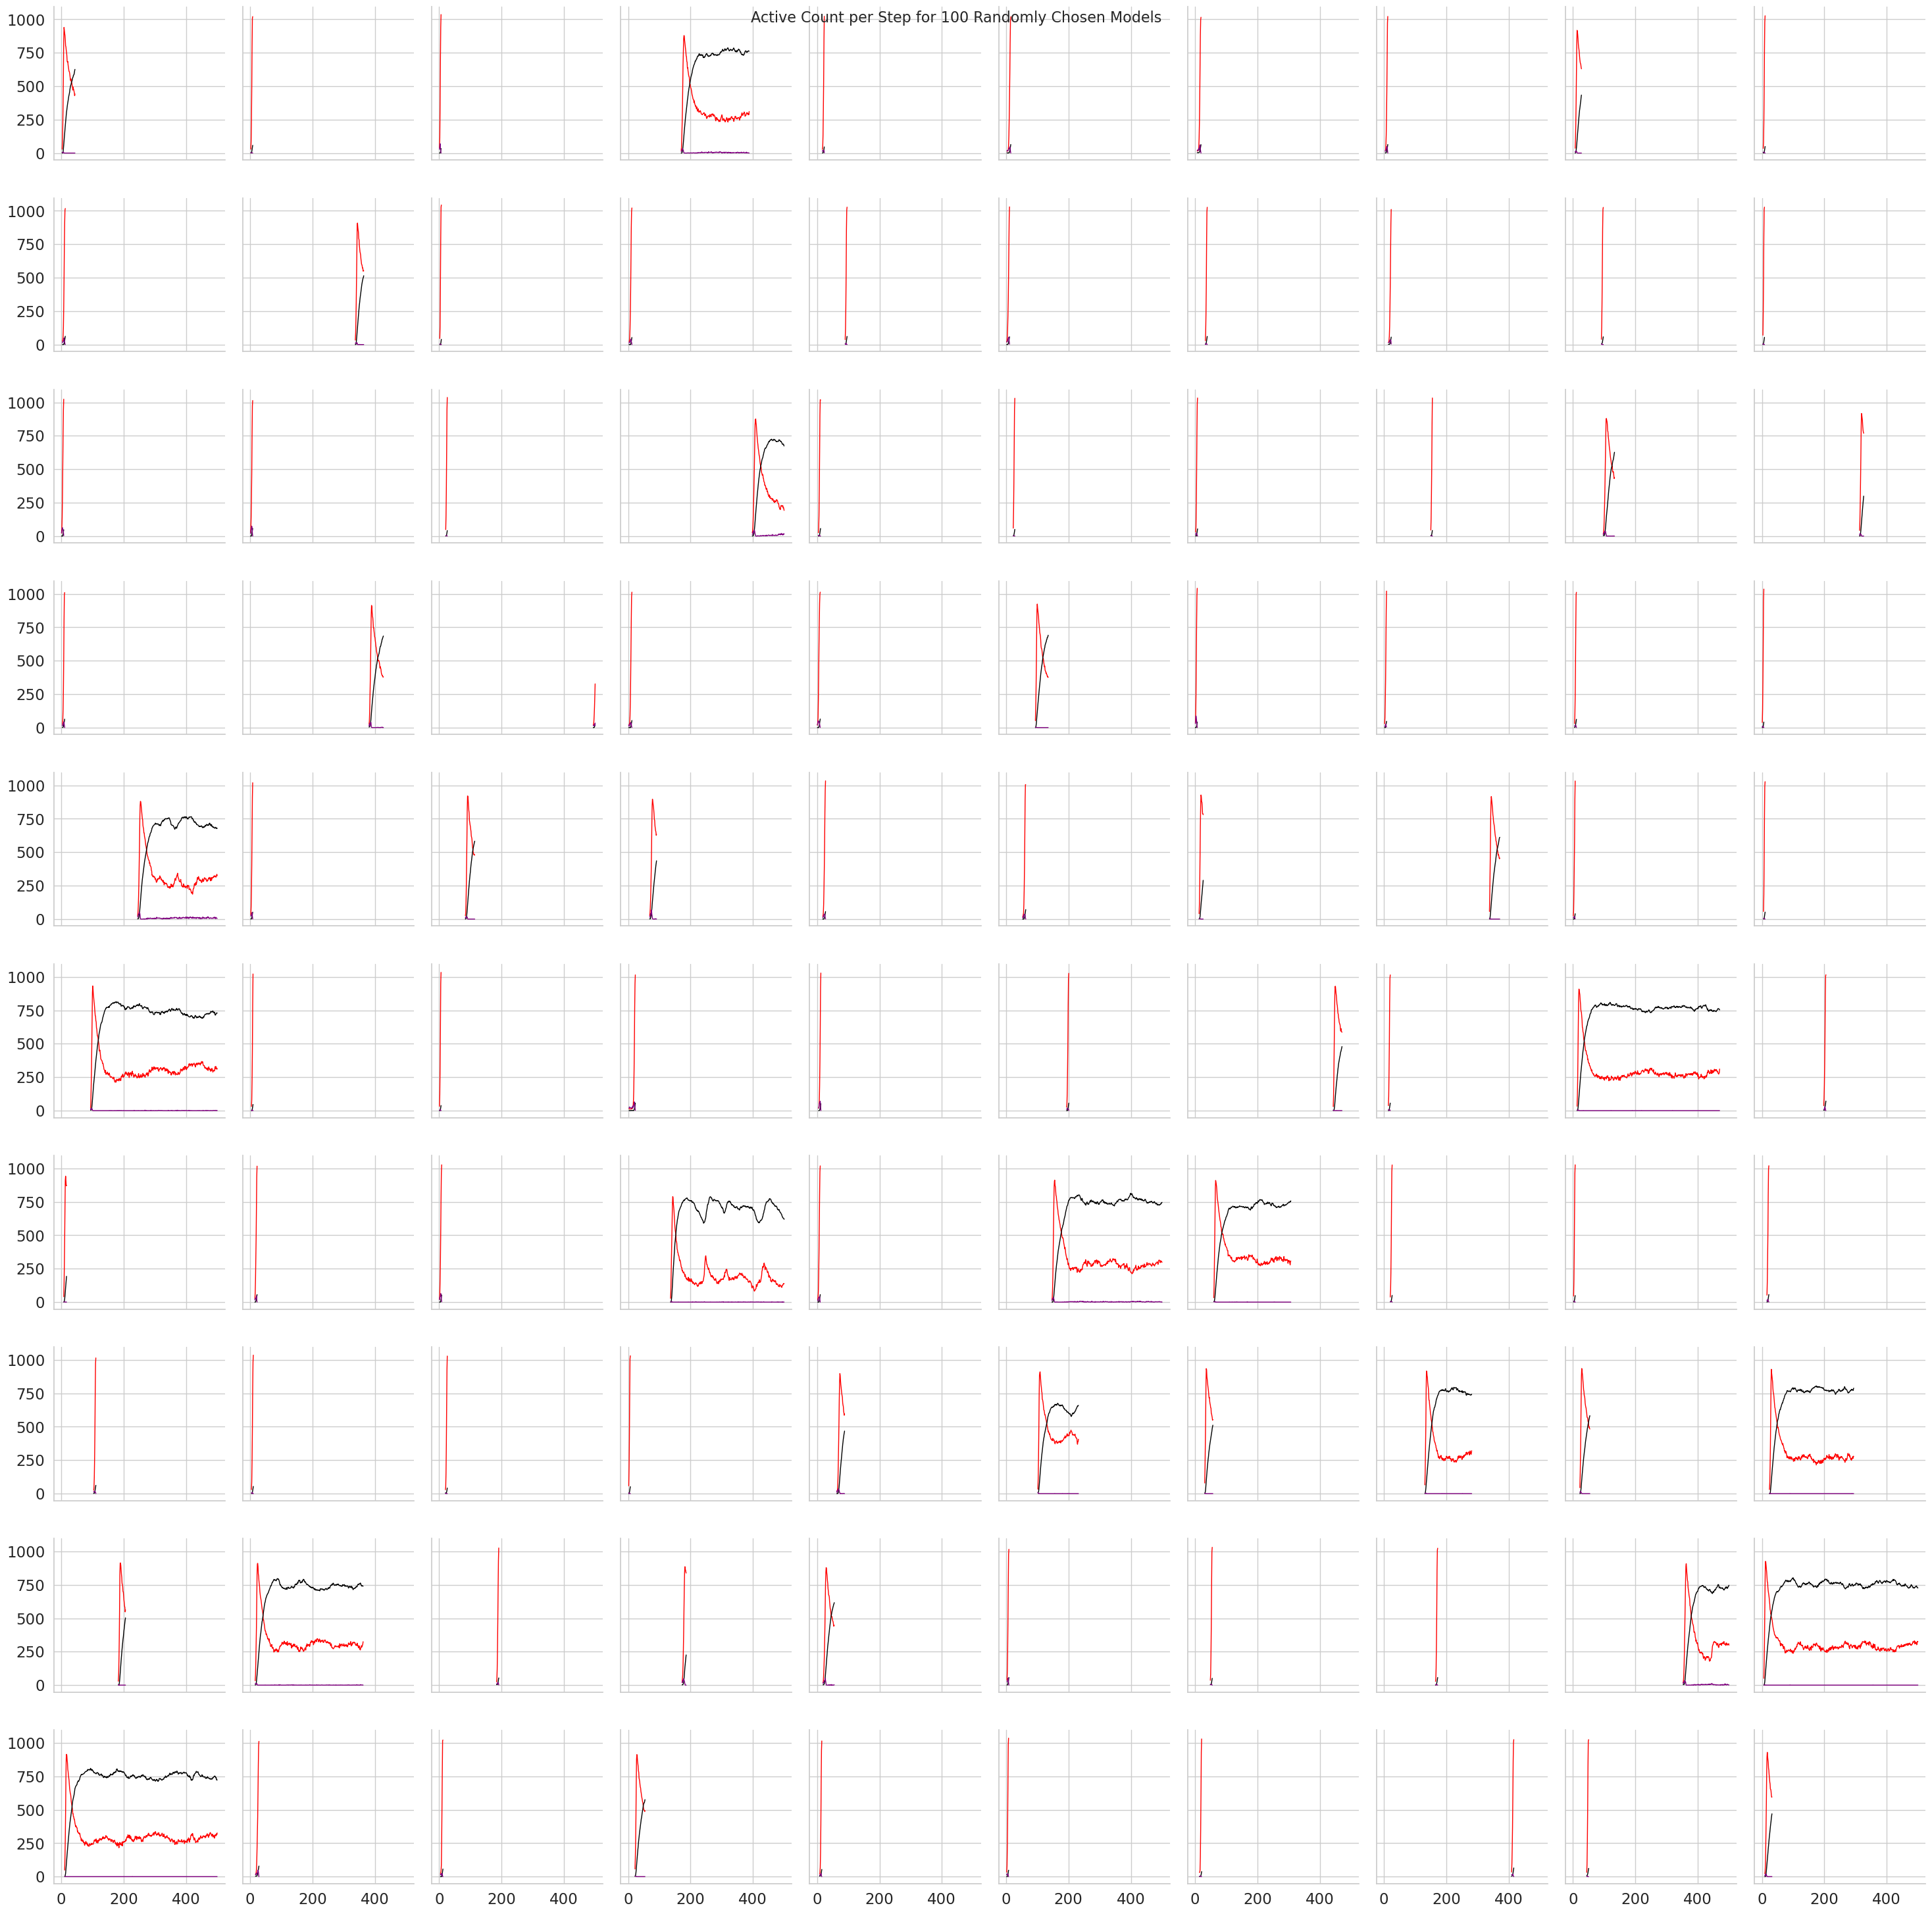

Selected Models:
1. Seed 344092 SD0.01 PP 0 EP 0.2 Th 2.94444
2. Seed 344059 SD0.01 PP -1 EP 0.2 Th 2.94444
3. Seed 344088 SD0.01 PP -0.8 EP 0.8 Th 2.94444
4. Seed 344022 SD0.02 PP -1 EP 0.5 Th 2.94444
5. Seed 344009 SD0.02 PP -0.8 EP 0.8 Th 2.94444
6. Seed 344095 SD0.02 PP -0.8 EP 0.5 Th 2.94444
7. Seed 344066 SD0.02 PP -0.8 EP 0.1 Th 2.94444
8. Seed 344003 SD0.01 PP -0.2 EP 1 Th 2.94444
9. Seed 344021 SD0.02 PP -0.8 EP 0.2 Th 2.94444
10. Seed 344089 SD0.01 PP -1 EP 0.8 Th 2.94444
11. Seed 344040 SD0.01 PP 0 EP 0.1 Th 2.94444
12. Seed 344067 SD0.01 PP 0 EP 0.2 Th 2.94444
13. Seed 344033 SD0.01 PP -0.8 EP 0.5 Th 2.94444
14. Seed 344051 SD0.01 PP -0.5 EP 1 Th 2.94444
15. Seed 344031 SD0.02 PP -0.8 EP 0.5 Th 2.94444
16. Seed 344051 SD0.01 PP -0.8 EP 0.5 Th 2.94444
17. Seed 344014 SD0.01 PP -1 EP 0.1 Th 2.94444
18. Seed 344048 SD0.01 PP 0 EP 0.8 Th 2.94444
19. Seed 344070 SD0.02 PP -1 EP 0.5 Th 2.94444
20. Seed 344056 SD0.01 PP 0 EP 0.2 Th 2.94444
21. Seed 344052 SD0.01 PP -0.5 EP 0.1 Th 

In [128]:
# Filter the DataFrame to include only rows where 'Combined Count' is above 112
filtered_df = df[df['Combined Count'] >= 30]

# Group by 'Model' and filter the groups that have at least 50 rows
grouped = filtered_df.groupby('Model')
filtered_df = grouped.filter(lambda x: len(x) >= 5)

# Randomly select 100 unique models
random_models = np.random.choice(filtered_df['Model'].unique(), size=100, replace=False)

# Filter the DataFrame again to include only the selected models
filtered_df = filtered_df[filtered_df['Model'].isin(random_models)]

# Create FacetGrid with line plots for each model
g = sns.FacetGrid(filtered_df, col='Model', col_wrap=10, height=3, aspect=1)
g.map_dataframe(sns.lineplot, x='Step', y='Active Count', color="red", linewidth=1)
g.map_dataframe(sns.lineplot, x='Step', y='Jail Count', color="black", linewidth=1)
g.map_dataframe(sns.lineplot, x='Step', y='Oppose Count', color="purple", linewidth=1)

# Customize the FacetGrid
g.set_axis_labels('', '')
g.set_titles("")
g.fig.suptitle('Active Count per Step for 100 Randomly Chosen Models', fontsize=16)

plt.show()

# Print out the selected models
print("Selected Models:")
for i, model in enumerate(random_models):
    print(f"{i+1}. {model}")


In [2]:
def equation(x, c):
    return x ** ((c**2 + 1) ** -1)

In [19]:
x_values = np.linspace(1, 100, 1000)
epsilon_values = [0, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5]

data = []

for epsilon in epsilon_values:
    for x in x_values:
        y = equation(x, epsilon)
        data.append([x, epsilon, y])

df = pd.DataFrame(data, columns=['Actives in Vision', 'Epsilon', 'y'])


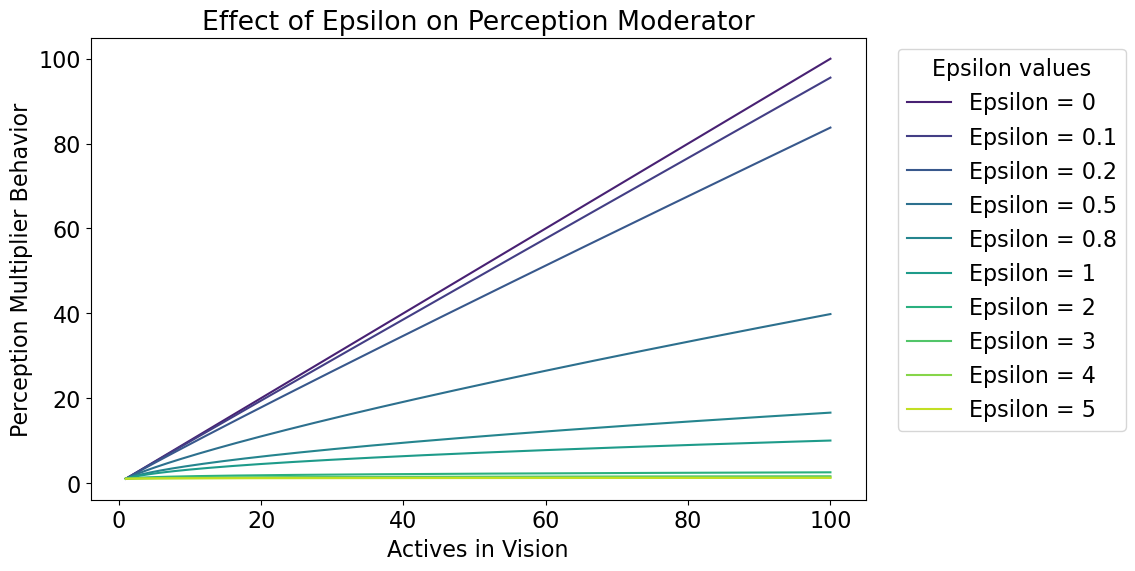

In [27]:
plt.figure(figsize=(10, 6))

# Create a color palette with the same number of colors as unique epsilon_values
colors = sns.color_palette("viridis", len(epsilon_values))

# Plot each epsilon value separately and store their labels
lines = []
labels = []
for index, epsilon in enumerate(epsilon_values):
    temp_df = df[df['Epsilon'] == epsilon]
    line, = plt.plot(temp_df['Actives in Vision'], temp_df['y'], color=colors[index])
    lines.append(line)
    labels.append(f'Epsilon = {epsilon}')

plt.xlabel('Actives in Vision')
plt.ylabel('Perception Multiplier Behavior')
plt.title('Effect of Epsilon on Perception Moderator')

# Create a custom legend with the correct labels
plt.legend(lines, labels, title='Epsilon values', loc='upper right', bbox_to_anchor=(1.35, 1))
plt.savefig("li_calc.png", dpi=300, bbox_inches="tight")
plt.show()

